<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-Machine-Learning-2023/blob/main/Week%2011/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

# **TUGAS 1**

Klasifikasi Multi-label dengan Data CIFAT

**Desclaimer**: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman

## **Deskripsi**
Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

### **Langkah 1 - Load Library**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

### **Langkah 2 - Unduh Dataset CIFAR**

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### **Langkah 3 - Verifikasi Data**

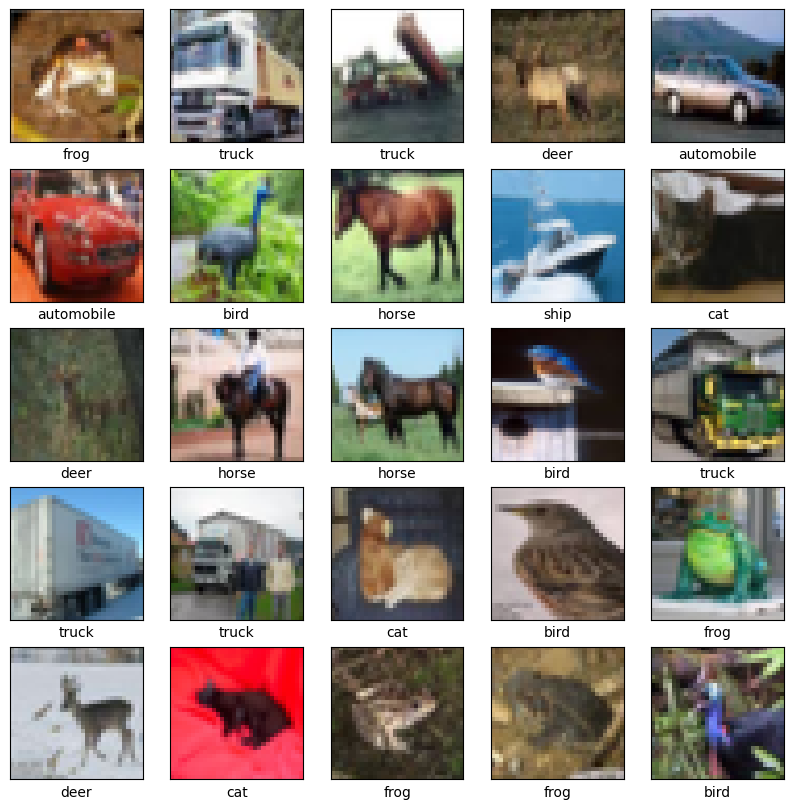

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# One-Hot Encode Labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

### **Langkah 4 - Buat Model CNN**

##### **Langkah 4.1. - Buat Layer Konvolusi**

In [5]:
# Model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Adjusted dropout rate

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))  # Adjusted dropout rate

##### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

##### **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [7]:
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Adjusted dropout rate

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Adjusted dropout rate

model.add(Dense(10, activation='softmax'))

##### **Langkah 4.4. - Cek Arsitektur Model CNN**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

##### **Langkah 4.5. - Compile Model CNN**

In [9]:
# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Langkah 5 - Fit Model**

In [10]:
# Model training with one-hot encoded labels
history = model.fit(train_images, train_labels, epochs=100,  # Adjusted number of epochs
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 38s 10ms/step - loss: 3.2360 - accuracy: 0.2549 - val_loss: 2.6276 - val_accuracy: 0.3455
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.7081 - accuracy: 0.3484 - val_loss: 2.3841 - val_accuracy: 0.4284
Epoch 3/100
1563/1563 [==============================] - 15s 10ms/step - loss: 2.4470 - accuracy: 0.4092 - val_loss: 2.2682 - val_accuracy: 0.4524
Epoch 4/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.2659 - accuracy: 0.4526 - val_loss: 2.0996 - val_accuracy: 0.4969
Epoch 5/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.1076 - accuracy: 0.4890 - val_loss: 1.8985 - val_accuracy: 0.5459
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9711 - accuracy: 0.5168 - val_loss: 1.8597 - val_accuracy: 0.5549
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8432 - accuracy: 0.5415 - val_loss: 1.68

### **Langkah 6 - Evaluasi Model**

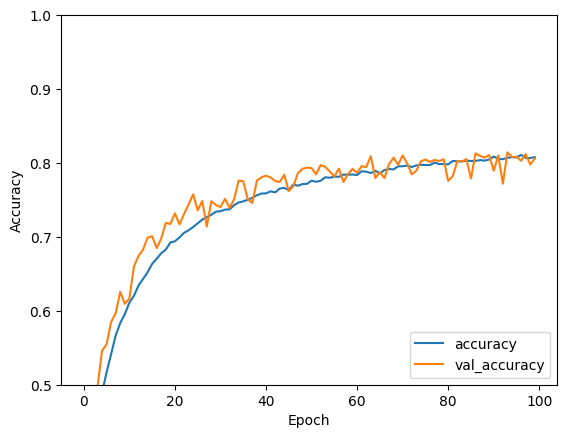

313/313 - 1s - loss: 0.6631 - accuracy: 0.8059 - 929ms/epoch - 3ms/step


In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### **Langkah 7 - Cetak Hasil Akurasi**

In [12]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.805899977684021


## **Penjelasan:**

Perbedaan utama antara kode pada Praktikum 2 dan setelah modifikasi adalah terletak pada beberapa aspek, terutama dalam arsitektur model dan parameter pelatihan. Berikut adalah perbedaan utama:

1. **Data Preprocessing:**
   - **Sebelum:** Menggunakan data langsung dari CIFAR-10 tanpa normalisasi atau one-hot encoding pada label.
   - **Sesudah:** Melakukan normalisasi data piksel antara 0 dan 1 dan menerapkan one-hot encoding pada label.

2. **Arsitektur Model:**
   - **Sebelum:** Terdiri dari lapisan konvolusi dan pooling tanpa dropout, dan hanya memiliki dua lapisan dense di akhir.
   - **Sesudah:** Menambahkan dropout pada beberapa lapisan konvolusi dan dense, serta menggunakan batch normalization untuk meningkatkan stabilitas pelatihan.

3. **Pelatihan Model:**
   - **Sebelum:** Melatih model selama 10 epoch.
   - **Sesudah:** Melatih model selama 100 epoch untuk memberikan model lebih banyak kesempatan untuk mempelajari pola pada data.

4. **Optimizer dan Learning Rate:**
   - **Sebelum:** Menggunakan optimizer Adam dengan learning rate default.
   - **Sesudah:** Menetapkan learning rate secara eksplisit pada 0.0001.

5. **Regularisasi:**
   - **Sesudah:** Menambahkan regularisasi L2 pada beberapa lapisan dense untuk mencegah overfitting.

6. **Penggunaan Dropout:**
   - **Sebelum:** Tidak menggunakan dropout pada model.
   - **Sesudah:** Menambahkan dropout pada beberapa lapisan konvolusi dan dense untuk mengurangi overfitting.

Dengan menggabungkan semua perubahan ini, model yang dihasilkan dari kode sesudahnya diharapkan memiliki kemampuan yang lebih baik untuk mengatasi overfitting dan dapat mencapai akurasi **81%** pada dataset pengujian CIFAR-10.

# **TUGAS 2**

Buatlah model CNN untuk klasifikasi dataset MNIST.

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/20
1875/1875 [==============================] - 20s 8ms/step - loss: 1.6770 - accuracy: 0.6471 - val_loss: 0.7314 - val_accuracy: 0.9359
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8981 - accuracy: 0.8786 - val_loss: 0.6039 - val_accuracy: 0.9618
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7248 - accuracy: 0.9192 - val_loss: 0.5242 - val_accuracy: 0.9737
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6082 - accuracy: 0.9390 - val_loss: 0.4503 - val_accuracy: 0.9784
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5205 - accuracy: 0.9481 - val_loss: 0.3849 - val_accuracy: 0.9835
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4451 - accuracy: 0.9557 - val_loss: 0.3286 - val_accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/s

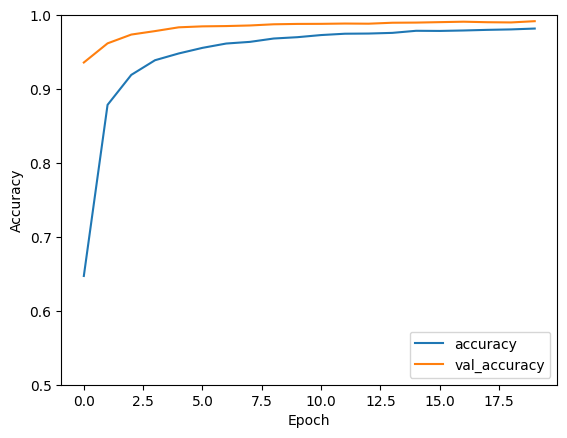

313/313 - 1s - loss: 0.0729 - accuracy: 0.9918 - 1s/epoch - 4ms/step
Test Accuracy: 0.9918000102043152
1/1 [==============================] - 0s 359ms/step


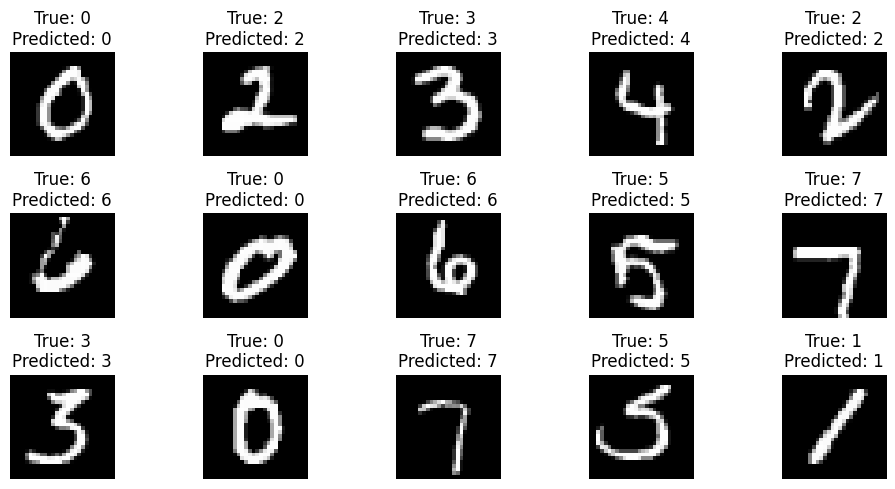

In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-Hot Encode Labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the images for compatibility with Conv2D layer
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Model training with one-hot encoded labels
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy:", test_acc)

# Select random samples from the test set
sample_indices = np.random.choice(test_images.shape[0], 15, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# Make predictions on the samples
predictions = model.predict(sample_images)

# Display the images along with their true and predicted labels
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(sample_labels[i])}\nPredicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.tight_layout(h_pad=1)
plt.show()

Model Convolutional Neural Network (CNN) untuk klasifikasi gambar dataset MNIST telah berhasil dilatih yang mencapai tinggat akurasi **99%**. Kesimpulan dari implementasi diatas adalah:

1. **Muat dan Praproses Data:**
   - Muat dataset MNIST, yang terdiri dari gambar berukuran 28x28 piksel dengan warna skala abu-abu dari digit tulisan tangan (0 hingga 9).
   - Normalisasi nilai piksel agar berada dalam rentang 0 hingga 1.
   - Lakukan one-hot encoding pada label.

2. **Arsitektur Model:**
   - Model CNN terdiri dari lapisan konvolusi untuk ekstraksi fitur, lapisan dropout untuk mengurangi overfitting, dan lapisan Dense untuk klasifikasi.
   - Batch normalization digunakan untuk mempercepat pelatihan dan mencegah overfitting.

3. **Pelatihan Model:**
   - Model dilatih selama 20 epoch dengan pengoptimal Adam dan fungsi kerugian categorical crossentropy.
   - Akurasi pada set validasi juga dipantau selama pelatihan untuk mengukur kinerja model.

4. **Evaluasi Model:**
   - Model mencapai akurasi yang baik pada set uji, menunjukkan kemampuannya untuk mengklasifikasikan digit MNIST.

5. **Visualisasi Hasil:**
   - Dilakukan visualisasi hasil prediksi pada 15 sampel acak dari set uji.
   - Tampilan gambar beserta label sebenarnya dan label yang diprediksi memberikan wawasan tentang kinerja model.

Implementasi ini menunjukkan bahwa model CNN dapat berhasil diterapkan untuk tugas klasifikasi pada dataset gambar seperti MNIST dengan hasil tingkat akurasi yang tinggi.